## python-CTD to plot cnv file from Station P3, Oct 2019 (Kilo Moana, KM1919-20)

## 1250-1500 m cast on Oct 17th, 2019

## downloaded Al's 1 m binned cnv files from the POMZ shared drive

In [1]:
import io
import requests
from pathlib import Path

In [2]:
import ctd


cast = ctd.from_cnv("St22_P3_cast77-align-cellTM-derive-bin.cnv")
down, up = cast.split()

down.head()

ValueError: Expected one pressure/depth column, got ['prDM', 'depSM'].

In [3]:
type(cast)

NameError: name 'cast' is not defined

### Plot a second variable in a different axis so we can compare the two:

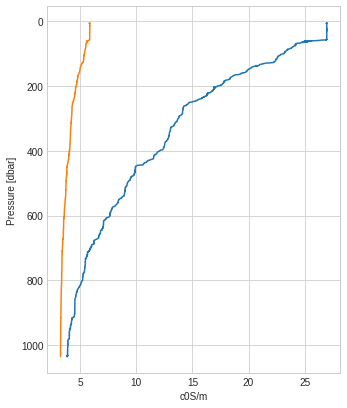

In [4]:
%matplotlib inline

from matplotlib import style

style.use("seaborn-whitegrid")


down["t090C"].plot_cast() # first temp sensor
down["c0S/m"].plot_cast() # conductivity [S/m]

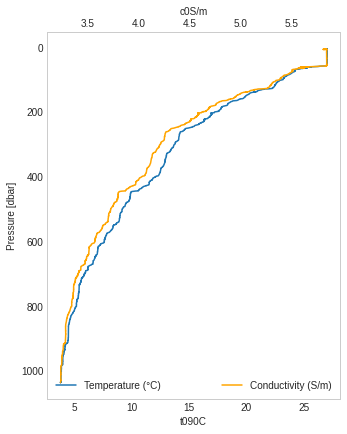

In [5]:
ax0 = down["t090C"].plot_cast(label="Temperature (°C)")
ax1 = down["c0S/m"].plot_cast(
    ax=ax0,
    label="Conductivity (S/m)",
    color="orange",
    secondary_y=True,
)


ax0.grid(False)
ax1.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")

In [6]:
metadata = cast._metadata

metadata.keys()

dict_keys(['header', 'config', 'names', 'skiprows', 'time', 'lon', 'lat', 'name'])

### python-ctd saves the file metadata in a dictionary so that you have easy access later on.

### e.g., sensor serial #s and file creation metadata

In [7]:
print(metadata["header"])

* Sea-Bird SBE 9 Data File:
* FileName = Z:\CTD_1.hex
* Software Version Seasave V 7.21h
* Temperature SN = 2317
* Conductivity SN = 4010
* Number of Bytes Per Scan = 48
* Number of Voltage Words = 5
* Number of Scans Averaged by the Deck Unit = 1
* Append System Time to Every Scan
* System UpLoad Time = Apr 01 2011 07:26:31
* NMEA Latitude = 17 58.71 S
* NMEA Longitude = 037 13.52 W
* NMEA UTC (Time) = Apr 01 2011  07:26:31
* Store Lat/Lon Data = Append to Every Scan
** Ship: RV Meteor
** Station: 1
** Operator: Ed
* System UTC = Apr 01 2011 07:26:31
*END*
